In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = data.drop(['RowNumber','CustomerId','Surname','Geography','Gender','Exited'],axis=1)
y = data['Exited']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [9]:
#MLP Classifier

from sklearn.neural_network import MLPClassifier

uk_mlp = MLPClassifier(hidden_layer_sizes=(10,5),
                    solver='sgd',
                    activation='relu',
                    batch_size=32,
                    verbose=True)

uk_mlp

MLPClassifier(batch_size=32, hidden_layer_sizes=(10, 5), solver='sgd',
              verbose=True)

In [10]:
uk_mlp.fit(x_train,y_train)

Iteration 1, loss = 0.62323011
Iteration 2, loss = 0.53903829
Iteration 3, loss = 0.50933575
Iteration 4, loss = 0.49472359
Iteration 5, loss = 0.48557904
Iteration 6, loss = 0.47860059
Iteration 7, loss = 0.47274019
Iteration 8, loss = 0.46772452
Iteration 9, loss = 0.46335418
Iteration 10, loss = 0.45942992
Iteration 11, loss = 0.45596183
Iteration 12, loss = 0.45301057
Iteration 13, loss = 0.45045387
Iteration 14, loss = 0.44838862
Iteration 15, loss = 0.44657371
Iteration 16, loss = 0.44503192
Iteration 17, loss = 0.44371246
Iteration 18, loss = 0.44252714
Iteration 19, loss = 0.44146289
Iteration 20, loss = 0.44045781
Iteration 21, loss = 0.43954438
Iteration 22, loss = 0.43863307
Iteration 23, loss = 0.43779039
Iteration 24, loss = 0.43696286
Iteration 25, loss = 0.43613431
Iteration 26, loss = 0.43532139
Iteration 27, loss = 0.43443290
Iteration 28, loss = 0.43353809
Iteration 29, loss = 0.43258531
Iteration 30, loss = 0.43150546
Iteration 31, loss = 0.43033157
Iteration 32, los

c:\Users\hp\anaconda3\envs\ML_Lab1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(10, 5), solver='sgd',
              verbose=True)

In [11]:
print("Training:",uk_mlp.score(x_train,y_train))


Training: 0.858125


In [12]:
#print(x_test.shape,y_test.shape)
print("Testing:",uk_mlp.score(x_test,y_test))


Testing: 0.8615


In [13]:
y_pred = uk_mlp.predict(x_test)

In [15]:
#Meeeeeetrics

y_pred = uk_mlp.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,roc_curve

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1 = f1_score(y_test,y_pred)
print("F1-Score:",f1)

prec = precision_score(y_test,y_pred)
print("Precision:",prec)

recall = recall_score(y_test,y_pred)
print("Recall:",recall)


con = confusion_matrix(y_test,y_pred)
print(con)

Accuracy: 0.8615
F1-Score: 0.5809379727685325
Precision: 0.75
Recall: 0.4740740740740741
[[1531   64]
 [ 213  192]]


Text(0, 0.5, 'Loss')

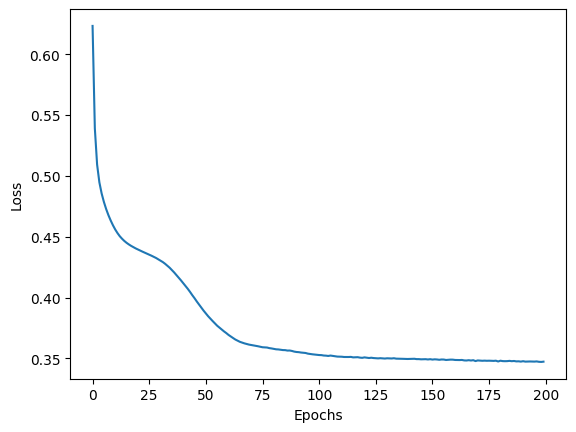

In [17]:
from matplotlib import pyplot as plt

l = uk_mlp.loss_curve_

plt.plot(l)
plt.xlabel('Epochs')
plt.ylabel('Loss')